In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for Q-Q plots 
import scipy.stats as stats

In [23]:
data = pd.read_csv('BostonHousing.csv',usecols=['rm','lstat','crim'])
data.head()

,crim,rm,lstat
0,0.00632,6.575,4.98
1,0.02731,6.421,9.14
2,0.02729,7.185,4.03
3,0.03237,6.998,2.94
4,0.06905,7.147,5.33


In [26]:
# function to create histogram,Q-Q plot and boxplot
def diagnostic_plots(df,variable):
    
    
    #def figure size 
    plt.figure(figsize=(16,4))
    
    
    #histogram
    plt.subplot(1,3,1)
    sns.histplot(df[variable],bins=30)
    plt.title("Histogram")
    
    #Q-Q plot
    plt.subplot(1,3,2)
    stats.probplot(df[variable],dist='norm',plot=plt)
    plt.ylabel('Variable Quantitle')
    
    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()



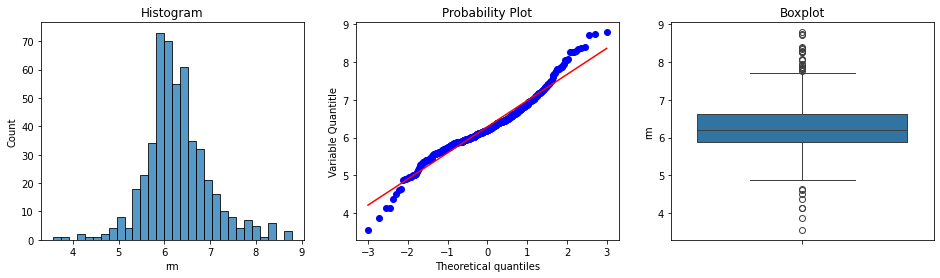

In [28]:


# let's find outliers in RM

diagnostic_plots(data, 'rm')



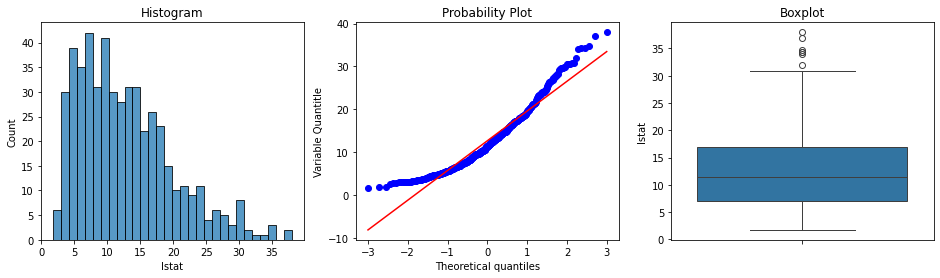

In [29]:
# let's find outliers in RM

diagnostic_plots(data, 'lstat')


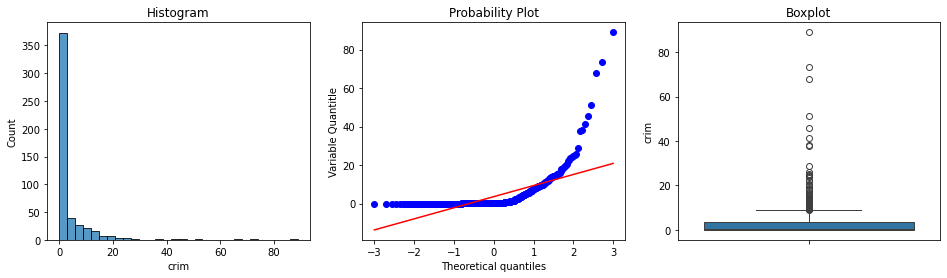

In [30]:
# let's find outliers in RM

diagnostic_plots(data, 'crim')


In [31]:
def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary


In [33]:
# find limits for RM

RM_upper_limit, RM_lower_limit = find_skewed_boundaries(data, 'rm', 1.5)
RM_upper_limit, RM_lower_limit


(7.730500000000001, 4.778499999999999)

In [35]:
# limits for LSTAT

LSTAT_upper_limit, LSTAT_lower_limit = find_skewed_boundaries(data, 'lstat', 1.5)
LSTAT_upper_limit, LSTAT_lower_limit


(31.962500000000006, -8.057500000000005)

In [37]:


# limits for CRIM

CRIM_upper_limit, CRIM_lower_limit = find_skewed_boundaries(data, 'crim', 1.5)
CRIM_upper_limit, CRIM_lower_limit



(9.06963875, -5.31051125)

In [42]:
# let's flag the outliers in the data set

outliers_rm = np.where(data['rm'] > RM_upper_limit, True,
                       np.where(data['rm'] < RM_lower_limit, True, False))


In [43]:
# let's flag the outliers in the data set

outliers_lstat = np.where(data['lstat'] > LSTAT_upper_limit, True,
                       np.where(data['lstat'] < LSTAT_lower_limit, True, False))


In [44]:
# let's flag the outliers in the data set

outliers_crim = np.where(data['crim'] > CRIM_upper_limit, True,
                       np.where(data['crim'] < CRIM_lower_limit, True, False))



In [47]:
# let trim the dataset
data_trimmed = data.loc[~(outliers_rm + outliers_lstat + outliers_crim), ]
data.shape, data_trimmed.shape

((506, 3), (416, 3))

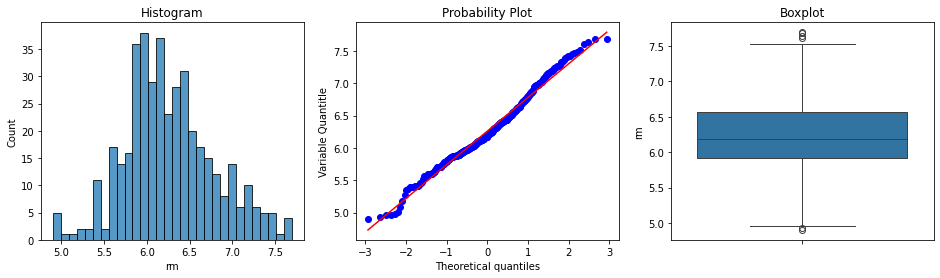

In [48]:
diagnostic_plots(data_trimmed,'rm')

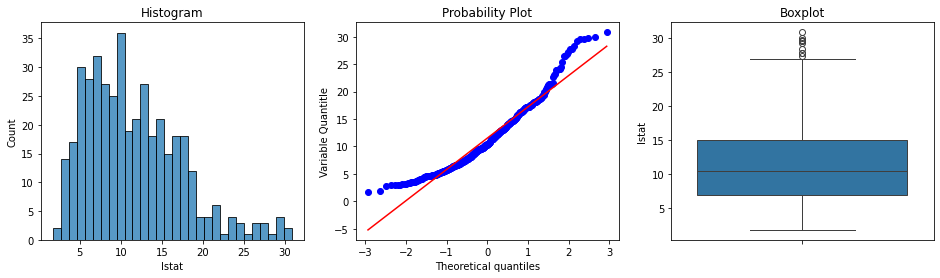

In [49]:
diagnostic_plots(data_trimmed,'lstat')

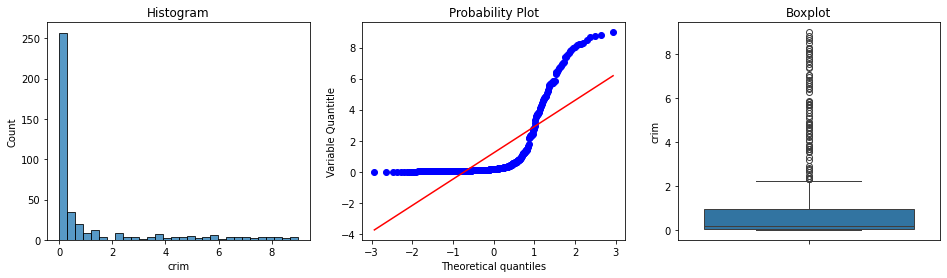

In [50]:
diagnostic_plots(data_trimmed,'crim')

In [51]:
# for lstat and crim we see many outliers,we trimmed our dataset with mean,quantiles and inter-quantile range, but see many unwanted data;
# unwanted value,not considered outliers